In [1]:
import sys
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN
from keras import optimizers
from tensorflow.keras import layers
from sklearn import svm
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn import model_selection as ms
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from random import *
from keras import utils
import seaborn as sns
sns.set

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.__version__)

2.5.0-dev20201029


In [3]:
raw_data = pd.read_excel('Data_preprocessing2.xlsx')
raw_data2 = pd.read_excel('Data_preprocessing.xlsx')


data = raw_data.copy()
data.tail()

,Model,LayerNum,PP,MatlMaker,RD,GD,MatlNum,RC,MatlG,Cu1,CP1,Cu2,CP2,Thickness
2050,45,6,1,DS7402M,1.36,2.56,2116.0,53.0,103.8,0.0,0,15.0,59,118.49
2051,45,7,0,DS7402M,1.36,2.56,NaN,NaN,NaN,15.0,59,33.0,73,61.44
2052,45,8,1,DS7402M,1.36,2.56,1080.0,67.0,46.8,33.0,73,15.0,55,73.73
2053,45,9,0,DS7402M,1.36,2.56,NaN,NaN,NaN,15.0,55,15.0,73,61.44
2054,45,10,1,DS7402M,1.36,2.56,1067.0,67.0,31.0,15.0,73,9.0,53,52.66


In [4]:
data.dtypes

Model          int64
LayerNum       int64
PP             int64
MatlMaker     object
RD           float64
GD           float64
MatlNum      float64
RC           float64
MatlG        float64
Cu1          float64
CP1            int64
Cu2          float64
CP2            int64
Thickness    float64
dtype: object

In [5]:
data = data.fillna(0)
data.head()

,Model,LayerNum,PP,MatlMaker,RD,GD,MatlNum,RC,MatlG,Cu1,CP1,Cu2,CP2,Thickness
0,1,1,1,DS7402M,1.36,2.56,1080.0,61.0,46.8,8.21,55,14.29,73,67.70
1,1,2,0,DS7402M,1.36,2.56,0.0,0.0,0.0,14.29,73,15.04,56,73.71
2,1,3,1,DS7402M,1.36,2.56,7628.0,47.0,203.4,15.04,56,14.58,46,187.25
3,1,4,0,DS7402M,1.36,2.56,0.0,0.0,0.0,14.58,46,14.29,75,77.47
4,1,5,1,DS7402M,1.36,2.56,3313.0,53.0,81.4,14.29,75,15.04,48,80.48


## TLB Simulation

In [ ]:
data["A"] = data["MatlG"].apply()

In [ ]:
data["MatlG"]/data["LayerNum"]

In [ ]:
def a_generate(g,rc):
    rc_r = rc.map(lambda x: x*0.01)
    return g/(1-rc_r)

In [ ]:
data.head()

In [ ]:
#data["RC"].map(lambda x: x*0.01)
data.apply(lambda x : a_generate("MatlG","RC"))

In [ ]:
cal = []
for i in range(len(data)):
    rc_ = data["RC"][i]*0.01
    g = data["MatlG"][i]
    cal.append(g/(1-rc_))
data["A"] = cal

In [ ]:
data.head()

In [ ]:
46.8/0.39

In [ ]:
def div(a,b):
    return a/b
def mul(a,b):
    return a*b
def sum_(a,b):
    return a+b
def diff_(a,b):
    return a-b


In [ ]:
data = data.drop(columns="A")

In [ ]:
A = div(data["MatlG"],diff_(1,mul(data["RC"],0.01)))
B = div(data["MatlG"],data["GD"])
C = diff_(A,data["MatlG"])
D = div(C,data["RD"])
T_1 = sum_(B,D)

In [ ]:
data["A"] = A
data["B"] = B
data["C"] = C
data["D"] = D
data["T1"] =T_1
data.head()

In [ ]:
data["total_eff"] = mul(data["Cu1"],diff_(1,div(data["CP1"],100))) + mul(data["Cu2"],diff_(1,div(data["CP2"],100)))
data["Score"] = mul(diff_(data["T1"],data["total_eff"]),0.97)


In [ ]:
data["Score_approxi"] = sum_(data["total_eff"],div(data["Thickness"],0.97))

In [ ]:
data.head()

In [ ]:
real_ = []
for i in range(len(data)):
    v_ = data["Score"][i]
    if v_ < 0:
        real_.append(data["Score_approxi"][i])
    else:
        real_.append(data["Score"][i])
data = data.drop(columns="Real_value")
data["Approxi_thick"] = real_

In [ ]:
data.head()

## SVM

In [ ]:
data2 = data.iloc[:,2:]
data2.head()

In [ ]:
data2.MatlMaker.value_counts()

In [ ]:
X = data2.iloc[:, 3:]
y = data2.iloc[:, 0]


X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y, 
                                                      test_size = 0.3, random_state = 100)


svm_clf =svm.SVC(kernel = 'linear', random_state=100)

scores = cross_val_score(svm_clf, X_scaled, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X_scaled, y, cv =5))

print('교차검증 평균: ', scores.mean())

In [ ]:
X = data2.iloc[:, 3:]
y = data2.iloc[:, 0]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y, 
                                                      test_size = 0.3, random_state = 100)


svm_clf =svm.SVC(kernel = 'linear', random_state=100)

scores = cross_val_score(svm_clf, X_scaled, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X_scaled, y, cv =5))

print('교차검증 평균: ', scores.mean())



In [ ]:
X = data2.iloc[:, 3:]
y = data2.iloc[:, 0]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y, 
                                                      test_size = 0.3, random_state = 100)


svm_clf =svm.SVC(kernel = 'linear', random_state=100)

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]} #C : cost, 어느 정도의 오차를 허용할지, 작을수록 오차 많이 허용

grid_svm = ms.GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

In [ ]:
X = data2.iloc[:, 3:]
y = data2.iloc[:, 0]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y, 
                                                      test_size = 0.3, random_state = 100)


svm_clf =svm.SVC(kernel = 'rbf')

scores = cross_val_score(svm_clf, X_scaled, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X_scaled, y, cv =5))

print('교차검증 평균: ', scores.mean())


In [ ]:
X = data2.iloc[:, 3:]
y = data2.iloc[:, 0]

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = ms.train_test_split(X_scaled, y, 
                                                      test_size = 0.3, random_state = 100)



svm_clf = svm.SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}    #gamma : 곡률 경계에 대한 파라미터, 클수록 경계가 값에 가까워짐

grid_svm = ms.GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

In [ ]:
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=principalComponents, columns = ['principal component1', 'principal component2',
                                                                'principal component3'])

In [ ]:
principalDf.head()

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 2', fontsize = 15)
ax.set_title('3 component PCA', fontsize=20)

targets = ['DS7402M', 'EM-370Z', 'NPG-151']
colors = ['r', 'g', 'b']
finalDf = pd.concat([principalDf, data2[['MatlMaker']]], axis = 1)
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['MatlMaker'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , finalDf.loc[indicesToKeep, 'principal component3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Regression

In [ ]:
data3 = raw_data.copy()
data3

In [ ]:
data3.isna()

In [ ]:
data3 = data3[data3['PP'] == 1]

In [ ]:
data3.head()

In [ ]:
data3 = data3.fillna(0)
#data3 = data3[data3["MatlNum"]!= 0]
#data3

In [ ]:
y = data3['Thickness']
x = data3[['RD','GD','RC','MatlG','Cu1','CP1','Cu2','CP2']]

x_train, x_test, y_train, y_test = ms.train_test_split(x,y, train_size = 0.8, test_size=0.2)

In [ ]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)

In [ ]:
y_predict = mlr.predict(x_test)

In [ ]:
x2 = sm.add_constant(x_train)
est = sm.OLS(y_train , x2)
est2 = est.fit()
print(est2.summary())

In [ ]:
fig = plt.figure()
ax = fig.gca()

ax.hist(y_test-y_predict)

## Regression 2

In [ ]:
data4 = raw_data.copy()

In [ ]:
data4 = data4.fillna(0)

In [ ]:
y = data4['Thickness']
x = data4[['RD','GD','RC','MatlG','Cu1','CP1','Cu2','CP2']]

x_train, x_test, y_train, y_test = ms.train_test_split(x,y, train_size = 0.8, test_size=0.2)

In [ ]:
x2 = sm.add_constant(x_train)
est = sm.OLS(y_train , x2)
est2 = est.fit()
print(est2.summary())

## RNN

In [6]:
data_rnn = raw_data.copy()

data_rnn = data_rnn[data_rnn['PP'] == 1]
data_rnn = data_rnn.drop(['PP','MatlMaker','MatlNum'],axis='columns')

data_rnn.shape

(1232, 11)

In [7]:
range_ = data_rnn['Model'].unique().tolist()

for i in range_:
    globals()['data_{}'.format(i)] = data_rnn[data_rnn['Model'] == i]
    globals()['data_{}'.format(i)].reset_index(drop = True, inplace=True)

In [8]:
# data_1.pop('Model')
# data_1.pop('LayerNum')
# data_1

In [9]:
# def des(x):
#     stats = x.describe().round(2)
#     stats = stats.drop(stats.columns[-1], axis =1)
#     stats = stats.transpose()
#     return stats

# for i in range_:
#     globals()['des_data_{}'.format(i)] = des(globals()['data_{}'.format(i)])

In [10]:
# for i in range_:
#     globals()['normed_data_{}'.format(i)] = (globals()['data_{}'.format(i)] \
#                                         - globals()['des_data_{}'.format(i)]['mean']) \
#                                         / globals()['des_data_{}'.format(i)]['std']

In [11]:
seq_all = []

for i in range_:
    l1 = len(globals()['data_{}'.format(i)]['LayerNum'].unique())
    l2 = len(globals()['data_{}'.format(i)])
    l3 = int(l2/l1)


    for j in range(1, l3+1):
        globals()['seq_{}_{}'.format(i,j)] = globals()['data_{}'.format(i)].copy().iloc[l1*(j-1):l1*j]
        globals()['seq_{}_{}'.format(i,j)].drop(['Model','LayerNum'], axis='columns', inplace=True)
        seq_all.append(globals()['seq_{}_{}'.format(i,j)])

#     for j in seq_all:
#         seq_x = j.drop('Thickness', axis=1)
#         seq_y = j['Thickness']


In [12]:
dataset = []

for i in range(1,len(range_)+1):
    l1 = len(globals()['data_{}'.format(i)]['LayerNum'].unique())
    l2 = len(globals()['data_{}'.format(i)])
    l3 = int(l2/l1)

    for j in range(1, l3+1):  
        size0 = globals()['seq_{}_{}'.format(i,j)].shape[0]
        size1 = globals()['seq_{}_{}'.format(i,j)].shape[1]
        pad = pd.DataFrame([[0]*size1],columns=globals()['seq_{}_{}'.format(i,j)].columns, index = range(9 - size0))
        globals()['seq_{}_{}'.format(i,j)] = pd.concat([globals()['seq_{}_{}'.format(i,j)], pad]).reset_index(drop=True)
        dataset.append(globals()['seq_{}_{}'.format(i,j)])

In [13]:
len(dataset)

211

In [38]:
dataset[0]

,RD,GD,RC,MatlG,Cu1,CP1,Cu2,CP2,Thickness
0,1.36,2.56,61.0,46.8,8.21,55,14.29,73,67.70
1,1.36,2.56,47.0,203.4,15.04,56,14.58,46,187.25
2,1.36,2.56,53.0,81.4,14.29,75,15.04,48,80.48
3,1.36,2.56,53.0,81.4,14.29,48,14.29,75,81.44
4,1.36,2.56,47.0,203.4,15.04,50,15.80,60,193.23
5,1.36,2.56,61.0,46.8,15.04,73,8.05,56,65.44
6,0.00,0.00,0.0,0.0,0.00,0,0.00,0,0.00
7,0.00,0.00,0.0,0.0,0.00,0,0.00,0,0.00
8,0.00,0.00,0.0,0.0,0.00,0,0.00,0,0.00


In [14]:
np.random.seed(0)
p = np.random.choice(211, 168 , replace=False)

In [15]:
train_dataset = [dataset[i] for i in p]

In [16]:
q = [i for i in range(211) if i not in p]

In [17]:
len(p) + len(q)

211

In [18]:
test_dataset = [dataset[i] for i in q]

In [19]:
# for i in range(210):
#     dataset[0] = dataset[0].append(dataset[i+1])

In [20]:
for i in range(len(p)-1):
    train_dataset[0] = train_dataset[0].append(train_dataset[i+1])
    
for i in range(len(q)-1):
    test_dataset[0] = test_dataset[0].append(test_dataset[i+1])

In [21]:
# dataset[0].reset_index(drop = True, inplace=True)
# train_dataset = dataset[0].sample(frac=0.9,random_state=0)     # data split
# test_dataset = dataset[0].drop(train_dataset.index)

In [22]:
train_dataset[0]

,RD,GD,RC,MatlG,Cu1,CP1,Cu2,CP2,Thickness
0,1.56,2.55,63.0,46.8,9.0,50,15.0,70,70.83
1,1.56,2.55,57.0,103.8,15.0,51,0.0,0,115.56
2,1.56,2.55,57.0,103.8,0.0,0,15.0,40,115.56
3,1.56,2.55,63.0,46.8,15.0,72,15.0,43,53.68
4,1.56,2.55,63.0,46.8,15.0,44,15.0,72,54.42
...,...,...,...,...,...,...,...,...,...
4,1.36,2.56,49.0,203.4,0.0,0,15.0,41,206.31
5,1.36,2.56,63.0,46.8,15.0,73,9.0,51,74.32
6,0.00,0.00,0.0,0.0,0.0,0,0.0,0,0.00
7,0.00,0.00,0.0,0.0,0.0,0,0.0,0,0.00


In [23]:
print(train_dataset[0].shape)
print(test_dataset[0].shape)

(1512, 9)
(387, 9)


In [24]:
train_seq_x = train_dataset[0].drop('Thickness', axis = 1)
train_seq_y = train_dataset[0]['Thickness']
test_seq_x = test_dataset[0].drop('Thickness', axis = 1)
test_seq_y = test_dataset[0]['Thickness']

In [25]:
train_seq_x.head(16)

,RD,GD,RC,MatlG,Cu1,CP1,Cu2,CP2
0,1.56,2.55,63.0,46.8,9.0,50,15.0,70
1,1.56,2.55,57.0,103.8,15.0,51,0.0,0
2,1.56,2.55,57.0,103.8,0.0,0,15.0,40
3,1.56,2.55,63.0,46.8,15.0,72,15.0,43
4,1.56,2.55,63.0,46.8,15.0,44,15.0,72
5,1.56,2.55,57.0,103.8,15.0,46,0.0,0
6,1.56,2.55,57.0,103.8,0.0,0,15.0,48
7,1.56,2.55,63.0,46.8,15.0,70,9.0,50
8,0.00,0.00,0.0,0.0,0.0,0,0.0,0
0,1.36,2.56,69.0,31.0,9.0,44,33.0,70


In [26]:
train_seq_x2 = train_seq_x.values.reshape(-1,9,8)
train_seq_y2 = train_seq_y.values.reshape(-1,9,1)

test_seq_x2 = test_seq_x.values.reshape(-1,9,8)
test_seq_y2 = test_seq_y.values.reshape(-1,9,1)

In [27]:
train_seq_y2

array([[[ 70.83 ],
        [115.56 ],
        [115.56 ],
        ...,
        [116.68 ],
        [ 69.34 ],
        [  0.   ]],

       [[ 48.6  ],
        [ 96.48 ],
        [ 96.75 ],
        ...,
        [  0.   ],
        [  0.   ],
        [  0.   ]],

       [[ 70.36 ],
        [ 70.97 ],
        [ 79.07 ],
        ...,
        [  0.   ],
        [  0.   ],
        [  0.   ]],

       ...,

       [[ 73.49 ],
        [159.125],
        [159.125],
        ...,
        [  0.   ],
        [  0.   ],
        [  0.   ]],

       [[ 46.62 ],
        [ 48.54 ],
        [  0.   ],
        ...,
        [  0.   ],
        [  0.   ],
        [  0.   ]],

       [[ 72.75 ],
        [208.485],
        [208.485],
        ...,
        [  0.   ],
        [  0.   ],
        [  0.   ]]])

In [28]:
def build_model():
    model = keras.Sequential()
    model.add(SimpleRNN(32, input_shape = (9, 8), return_sequences = True))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1))
#     model.add(layers.Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)

    model.compile(loss='mse',
                optimizer=adam,
                metrics=['mae', 'mse'])
    
    return model

In [29]:
model = build_model()

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 9, 32)             1312      
_________________________________________________________________
dense (Dense)                (None, 9, 8)              264       
_________________________________________________________________
dense_1 (Dense)              (None, 9, 8)              72        
_________________________________________________________________
dense_2 (Dense)              (None, 9, 1)              9         
Total params: 1,657
Trainable params: 1,657
Non-trainable params: 0
_________________________________________________________________


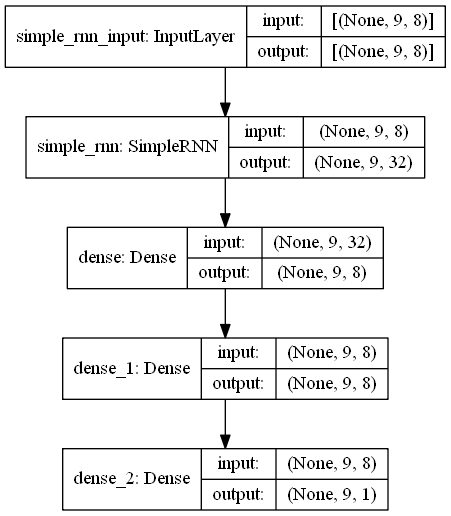

In [31]:
utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [32]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 400

history = model.fit(
  train_seq_x2, train_seq_y2,
  epochs=EPOCHS, validation_split = 0.1 ,
  verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [33]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
395,28.276297,3.201285,28.276295,26.693983,3.345264,26.693983,395
396,28.169916,3.189675,28.169914,26.100676,3.313217,26.100676,396
397,28.001711,3.186484,28.001713,26.212730,3.328630,26.212730,397
398,27.852446,3.180946,27.852448,25.884293,3.294539,25.884293,398
399,27.795420,3.163461,27.795418,25.784283,3.310293,25.784283,399


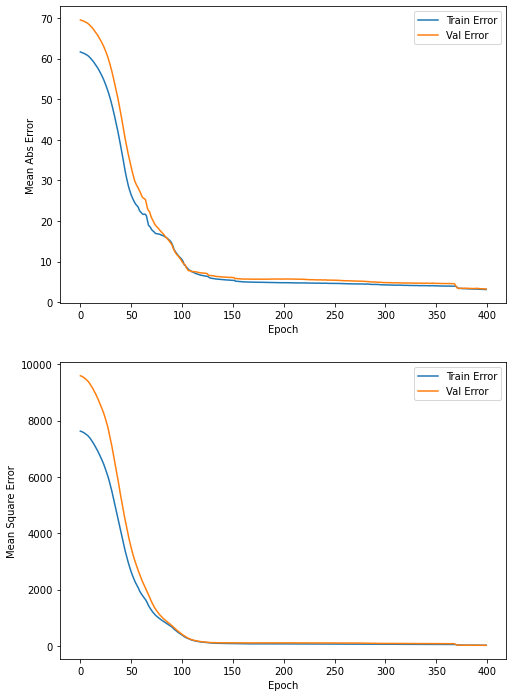

In [34]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist= pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
#     plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
#     plt.ylim([0,200])
    plt.legend()
    plt.show()

plot_history(history)

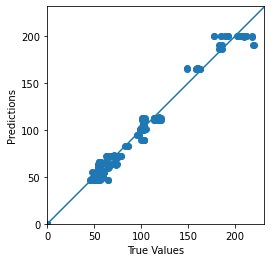

In [35]:
test_predictions = model.predict(test_seq_x2).flatten()

plt.scatter(test_seq_y, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 250], [-100, 250])

In [36]:
se = test_seq_y - test_predictions
se2 = se ** 2
s = sum(i for i in se2)

st = test_seq_y - np.mean(test_seq_y)
st2 = st ** 2
t = sum(i for i in st2)

r_sqr = 1 - (s/t)
r_sqr

0.9912231444829992

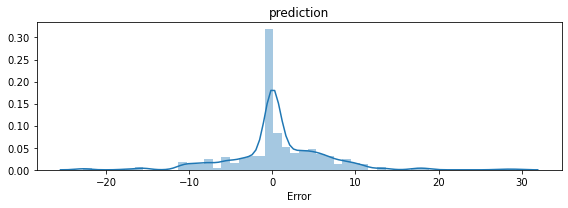

In [37]:
plt.figure(figsize=(8, 3))
sns.distplot(se, label="y_pred")
plt.xlabel("Error")
plt.title("prediction")
plt.tight_layout()
plt.show()

In [43]:
len(se)

387